Importing Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Loading Data

In [ ]:
!ls "/content/drive/My Drive/cse422/"


'heart failur classification dataset.csv'


In [ ]:
heart_data="/content/drive/My Drive/cse422/heart failur classification dataset.csv"


In [ ]:
dataframe=pd.read_csv(heart_data)
dataframe

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.0,Male,Yes,270.0,0
295,295,55.0,0,1820,0,38,0,270000.00,1.2,NaN,Female,No,271.0,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,Female,No,278.0,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.0,Male,Yes,280.0,0


Shape of the dataset

In [ ]:
dataframe.shape

(299, 14)

Checking Null Value

In [ ]:
dataframe.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

Dropping missing value coloums

In [ ]:
dataframe=dataframe.drop(['serum_sodium','time'], axis=1)

Datatype

In [ ]:
dataframe.shape

(299, 12)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 28.2+ KB


unique values of "sex"

In [ ]:
dataframe['sex'].unique()

array(['Male', 'Female'], dtype=object)

Encoding Categorical Values of sex

In [ ]:
enc=LabelEncoder()
dataframe['sex']=enc.fit_transform(dataframe['sex'])
print(dataframe[['sex']].head())

   sex
0    1
1    1
2    1
3    1
4    0


unique values of "smoking"

In [ ]:
dataframe['smoking'].unique()

array(['No', 'Yes'], dtype=object)

Encoding Categorical Values of smoking

In [ ]:
enc=LabelEncoder()
dataframe['smoking']=enc.fit_transform(dataframe['smoking'])
print(dataframe[['smoking']].head())

   smoking
0        0
1        0
2        1
3        0
4        0


Datatype

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


Seperating features and labels

In [ ]:
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]

Split the data into 80% training and 20% testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.82
Testing accuracy of the model is 0.72


**Neural Network Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.36
The Testing accuracy of the model is 0.42


**Ensemble Classifier (Random Forest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.72


**Dimensionality Reduction using PCA**

In [ ]:
dataframe1=pd.read_csv(heart_data)
dataframe1

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.0,Male,Yes,270.0,0
295,295,55.0,0,1820,0,38,0,270000.00,1.2,NaN,Female,No,271.0,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,Female,No,278.0,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.0,Male,Yes,280.0,0


In [ ]:
dataframe1.keys()

Index(['Unnamed: 0', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
dataframe1.smoking.shape

(299,)

In [ ]:
dataframe1_df= pd.DataFrame(dataframe1.age, columns=dataframe1["DEATH_EVENT"])
dataframe1_df=dataframe1_df.assign(target=dataframe1.smoking)
dataframe1_df.head()

DEATH_EVENT,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


**Splitting data after PCA**

In [ ]:
X1 = dataframe1_df.iloc[:, :-1]
y1 = dataframe1_df.iloc[:, -1]

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Support Vector after dimensionality reduction using PCA**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x1_train, y1_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x1_test, y1_test)))

Training accuracy of the model is 0.82
Testing accuracy of the model is 0.72


**Neural Network Classifier after dimensionality reduction using PCA**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x1_train, y1_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x1_train, y1_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x1_test, y1_test)))

The Training accuracy of the model is 0.71
The Testing accuracy of the model is 0.58


**Ensemble Classifier (Random Forest) after dimensionality reduction using PCA**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x1_train, y1_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x1_test, y1_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.73


**Bar Graph of Support Vector Machine comparing the training accuracy of the pre-PCA and post-PCA results.**

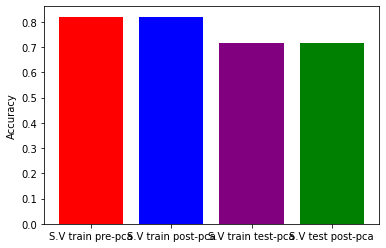

In [ ]:
labels = ['S.V train pre-pca', 'S.V train post-pca', 'S.V train test-pca', 'S.V test post-pca']
values = [svc.score(x_train, y_train), svc.score(x1_train, y1_train),svc.score(x_test, y_test),svc.score(x1_test, y1_test)]
plt.bar(labels, values, color=['red', 'blue', 'purple', 'green'])
plt.ylabel('Accuracy')
plt.show()

**Bar Graph of Neural Network (MLPClassifier) comparing the training and testing accuracy of the pre-PCA and post-PCA results.**

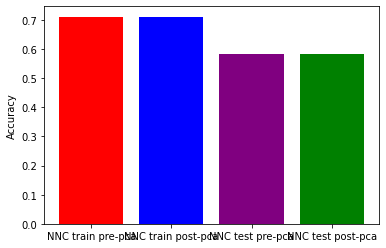

In [ ]:
labels = ['NNC train pre-pca', 'NNC train post-pca', 'NNC test pre-pca', 'NNC test post-pca']
values = [nnc.score(x_train, y_train), nnc.score(x1_train, y1_train), nnc.score(x_test, y_test),nnc.score(x1_test, y1_test)]
plt.bar(labels, values, color=['red', 'blue', 'purple', 'green'])
plt.ylabel('Accuracy')
plt.show()

**Bar Graph of Random Forest comparing the training and testing accuracy of the pre-PCA and post-PCA results.**

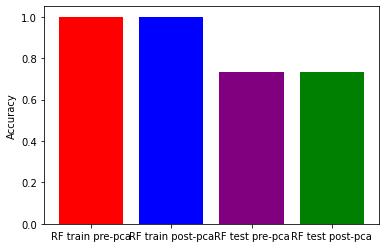

In [ ]:
labels = ['RF train pre-pca', 'RF train post-pca', 'RF test pre-pca', 'RF test post-pca']
values = [rfc.score(x_train, y_train), rfc.score(x1_train, y1_train), rfc.score(x_test, y_test),rfc.score(x1_test, y1_test)]
plt.bar(labels, values, color=['red', 'blue', 'purple', 'green'])
plt.ylabel('Accuracy')
plt.show()